In [1]:
import pypsa
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
import math
import networkx as nx

In [2]:
initial_network_nodes = pd.read_csv('database/substations_kalimantan.csv', sep = ",", quotechar = "'")

initial_network_nodes

,"""",node,type,lon,lat,frequency,voltage,node_id,wkt_srid_4326,""""
0,"""",GI_Sambas,substation,109.2688,1.3429,50,150,0,SRID=4326;POINT(109.2688 1.3429),""""
1,"""",GI_Singkawang,substation,108.9876,0.9266,50,150,1,SRID=4326;POINT(108.9876 0.9266),""""
2,"""",GI_PLTU_3_Kalbar,substation,108.8747,0.8361,50,150,2,SRID=4326;POINT(108.8747 0.8361),""""
3,"""",GI_PLTU_2_Kalbar,substation,108.8653,0.8300,50,150,3,SRID=4326;POINT(108.8653 0.83),""""
4,"""",GI_Senggiring,substation,108.9853,0.3162,50,150,4,SRID=4326;POINT(108.9853 0.3162),""""
...,...,...,...,...,...,...,...,...,...,...
57,"""",GI_Muara_Badak,substation,117.2925,-0.3160,50,150,57,SRID=4326;POINT(117.2925 -0.316),""""
58,"""",GI_Teluk_Pandan,substation,117.4350,0.1614,50,150,58,SRID=4326;POINT(117.435 0.1614),""""
59,"""",GI_Sangatta,substation,117.5693,0.4701,50,150,59,SRID=4326;POINT(117.5693 0.4701),""""
60,"""",GI_Malinau,substation,116.6286,3.5114,50,150,60,SRID=4326;POINT(116.6286 3.5114),""""


In [3]:
initial_network = pd.read_csv('database/lines_kalimantan.csv', sep = ",", quotechar = "'")

initial_network

,"""",nodeA,nodeB,bus0,bus1,voltage,cables,wires,frequency,length_m,r_ohmkm,x_ohmkm,c_nfkm,i_th_max_a,lon0,lat0,lon1,lat1,wkt_srid_4326,""""
0,"""",GI_Sambas,GI_Singkawang,0,1,150,3,2,50,59200,0.08,0.32,11.5,1.3,109.2688,1.3429,108.9876,0.9266,"SRID=4326;LINESTRING(109.2688 1.3429,108.9876 ...",""""
1,"""",GI_Singkawang,GI_PLTU_2_Kalbar,1,3,150,3,2,50,20829,0.08,0.32,11.5,1.3,108.9876,0.9266,108.8653,0.8300,"SRID=4326;LINESTRING(108.9876 0.9266,108.8653 ...",""""
2,"""",GI_PLTU_2_Kalbar,GI_PLTU_3_Kalbar,3,2,150,3,2,50,1393,0.08,0.32,11.5,1.3,108.8653,0.8300,108.8747,0.8361,"SRID=4326;LINESTRING(108.8653 0.83,108.8747 0....",""""
3,"""",GI_Singkawang,GI_Senggiring,1,4,150,3,2,50,70613,0.08,0.32,11.5,1.3,108.9876,0.9266,108.9853,0.3162,"SRID=4326;LINESTRING(108.9876 0.9266,108.9853 ...",""""
4,"""",GI_Senggiring,GI_Parit_Baru,4,5,150,3,2,50,42848,0.08,0.32,11.5,1.3,108.9853,0.3162,109.2055,0.0592,"SRID=4326;LINESTRING(108.9853 0.3162,109.2055 ...",""""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,"""",GI_Bukuan,GI_Sambutan,54,56,150,3,2,50,7177,0.08,0.32,11.5,1.3,117.1930,-0.5832,117.2139,-0.5242,"SRID=4326;LINESTRING(117.193 -0.5832,117.2139 ...",""""
58,"""",GI_Sambutan,GI_Muara_Badak,56,57,150,3,2,50,27134,0.08,0.32,11.5,1.3,117.2139,-0.5242,117.2925,-0.3160,"SRID=4326;LINESTRING(117.2139 -0.5242,117.2925...",""""
59,"""",GI_Muara_Badak,GI_Teluk_Pandan,57,58,150,3,2,50,57500,0.08,0.32,11.5,1.3,117.2925,-0.3160,117.4350,0.1614,"SRID=4326;LINESTRING(117.2925 -0.316,117.435 0...",""""
60,"""",GI_Teluk_Pandan,GI_Sangatta,58,59,150,3,2,50,42347,0.08,0.32,11.5,1.3,117.4350,0.1614,117.5693,0.4701,"SRID=4326;LINESTRING(117.435 0.1614,117.5693 0...",""""


In [4]:
combined = initial_network.merge(initial_network_nodes, left_on = "nodeA", right_on = "node", suffixes = ("_left", "_right"))
combined = combined.merge(initial_network_nodes, left_on  = "nodeB", right_on = "node", suffixes = ("_A", "_B"))
combined = combined [["nodeA", "lon_A", "lat_A", "nodeB", "lon_B", "lat_B"]]

display(combined)

,nodeA,lon_A,lat_A,nodeB,lon_B,lat_B
0,GI_Sambas,109.2688,1.3429,GI_Singkawang,108.9876,0.9266
1,GI_Bengkayang,109.4967,0.9056,GI_Singkawang,108.9876,0.9266
2,GI_Singkawang,108.9876,0.9266,GI_PLTU_2_Kalbar,108.8653,0.8300
3,GI_Singkawang,108.9876,0.9266,GI_Senggiring,108.9853,0.3162
4,GI_PLTU_2_Kalbar,108.8653,0.8300,GI_PLTU_3_Kalbar,108.8747,0.8361
...,...,...,...,...,...,...
57,GI_Bukuan,117.1930,-0.5832,GI_Sambutan,117.2139,-0.5242
58,GI_Sambutan,117.2139,-0.5242,GI_Muara_Badak,117.2925,-0.3160
59,GI_Muara_Badak,117.2925,-0.3160,GI_Teluk_Pandan,117.4350,0.1614
60,GI_Teluk_Pandan,117.4350,0.1614,GI_Sangatta,117.5693,0.4701


In [5]:
basemap = folium.Map(location = [-0.152375, 113.899132], zoom_start = 6)

maxvoltage = max(initial_network_nodes.voltage)

for i in range(len(initial_network_nodes)):
    popupinfo = (initial_network_nodes.node.iloc[i]+ ",voltage:" + str(initial_network_nodes.voltage.iloc[i]))
    folium.CircleMarker(location = [initial_network_nodes.lat.iloc[i], initial_network_nodes.lon.iloc[i]], 
                       tooltip = popupinfo, color = "green", fill = True, 
                       radius = math.sqrt(10 * initial_network_nodes.voltage.iloc[i] / maxvoltage)).add_to(basemap)

for i in range(len(combined)):
    points = [[combined.lat_A.iloc[i], combined.lon_A.iloc[i]],
             [combined.lat_B.iloc[i], combined.lon_B.iloc[i]]]
    folium.PolyLine(points, color = "yellow", opacitiy = 0.7).add_to(basemap)
    
basemap.save("initial_nodes.html")

display(basemap)

In [8]:
vertices = pd.read_csv("database/substations_kalimantan.csv", sep = ",", quotechar = "'")
vertices.rename(columns = {"lon":"x", "lat":"y"}, inplace = True)

print(vertices["voltage"].value_counts(dropna = False))

150    61
275     1
Name: voltage, dtype: int64


In [9]:
vertices

,"""",node,type,x,y,frequency,voltage,node_id,wkt_srid_4326,""""
0,"""",GI_Sambas,substation,109.2688,1.3429,50,150,0,SRID=4326;POINT(109.2688 1.3429),""""
1,"""",GI_Singkawang,substation,108.9876,0.9266,50,150,1,SRID=4326;POINT(108.9876 0.9266),""""
2,"""",GI_PLTU_3_Kalbar,substation,108.8747,0.8361,50,150,2,SRID=4326;POINT(108.8747 0.8361),""""
3,"""",GI_PLTU_2_Kalbar,substation,108.8653,0.8300,50,150,3,SRID=4326;POINT(108.8653 0.83),""""
4,"""",GI_Senggiring,substation,108.9853,0.3162,50,150,4,SRID=4326;POINT(108.9853 0.3162),""""
...,...,...,...,...,...,...,...,...,...,...
57,"""",GI_Muara_Badak,substation,117.2925,-0.3160,50,150,57,SRID=4326;POINT(117.2925 -0.316),""""
58,"""",GI_Teluk_Pandan,substation,117.4350,0.1614,50,150,58,SRID=4326;POINT(117.435 0.1614),""""
59,"""",GI_Sangatta,substation,117.5693,0.4701,50,150,59,SRID=4326;POINT(117.5693 0.4701),""""
60,"""",GI_Malinau,substation,116.6286,3.5114,50,150,60,SRID=4326;POINT(116.6286 3.5114),""""


In [10]:
links = pd.read_csv("database/lines_kalimantan.csv", sep = ",", quotechar = "'")

links["cables"].fillna(3, inplace = True)
links["wires"].fillna(2, inplace = True)
links["length"] = links["length_m"]/1000.

print(links["voltage"].value_counts(dropna = False))

150    62
Name: voltage, dtype: int64


In [11]:
links

,"""",nodeA,nodeB,bus0,bus1,voltage,cables,wires,frequency,length_m,...,x_ohmkm,c_nfkm,i_th_max_a,lon0,lat0,lon1,lat1,wkt_srid_4326,"""",length
0,"""",GI_Sambas,GI_Singkawang,0,1,150,3,2,50,59200,...,0.32,11.5,1.3,109.2688,1.3429,108.9876,0.9266,"SRID=4326;LINESTRING(109.2688 1.3429,108.9876 ...","""",59.200
1,"""",GI_Singkawang,GI_PLTU_2_Kalbar,1,3,150,3,2,50,20829,...,0.32,11.5,1.3,108.9876,0.9266,108.8653,0.8300,"SRID=4326;LINESTRING(108.9876 0.9266,108.8653 ...","""",20.829
2,"""",GI_PLTU_2_Kalbar,GI_PLTU_3_Kalbar,3,2,150,3,2,50,1393,...,0.32,11.5,1.3,108.8653,0.8300,108.8747,0.8361,"SRID=4326;LINESTRING(108.8653 0.83,108.8747 0....","""",1.393
3,"""",GI_Singkawang,GI_Senggiring,1,4,150,3,2,50,70613,...,0.32,11.5,1.3,108.9876,0.9266,108.9853,0.3162,"SRID=4326;LINESTRING(108.9876 0.9266,108.9853 ...","""",70.613
4,"""",GI_Senggiring,GI_Parit_Baru,4,5,150,3,2,50,42848,...,0.32,11.5,1.3,108.9853,0.3162,109.2055,0.0592,"SRID=4326;LINESTRING(108.9853 0.3162,109.2055 ...","""",42.848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,"""",GI_Bukuan,GI_Sambutan,54,56,150,3,2,50,7177,...,0.32,11.5,1.3,117.1930,-0.5832,117.2139,-0.5242,"SRID=4326;LINESTRING(117.193 -0.5832,117.2139 ...","""",7.177
58,"""",GI_Sambutan,GI_Muara_Badak,56,57,150,3,2,50,27134,...,0.32,11.5,1.3,117.2139,-0.5242,117.2925,-0.3160,"SRID=4326;LINESTRING(117.2139 -0.5242,117.2925...","""",27.134
59,"""",GI_Muara_Badak,GI_Teluk_Pandan,57,58,150,3,2,50,57500,...,0.32,11.5,1.3,117.2925,-0.3160,117.4350,0.1614,"SRID=4326;LINESTRING(117.2925 -0.316,117.435 0...","""",57.500
60,"""",GI_Teluk_Pandan,GI_Sangatta,58,59,150,3,2,50,42347,...,0.32,11.5,1.3,117.4350,0.1614,117.5693,0.4701,"SRID=4326;LINESTRING(117.435 0.1614,117.5693 0...","""",42.347


In [12]:
# drop the DC lines
# not sure how this works

for voltage in [300,400,450]:
    links.drop(links[links.voltage == voltage].index,inplace=True)

In [13]:
# build the network
# don't forget to pray for the best

network = pypsa.Network()

pypsa.io.import_components_from_dataframe(network, vertices, "Bus")
pypsa.io.import_components_from_dataframe(network, links, "Line")

In [14]:

# add specific missing AC lines (if any)

#columns = ["bus0","bus1","wires","cables","voltage"]

#data = [["100","255",2,6,220000], # Niederstedem to Wengerohr
#        ["384","351",4,6,380000], # Raitersaich to Ingolstadt
#        ["351","353",4,6,380000], # Ingolstadt to Irsching
#        ]

#last_kalimantan_line = int(network.lines.index[-1])
#index = [str(i) for i in range(last_kalimantan_line+1, last_kalimantan_line+1 + len(data))]

#missing_lines = pd.DataFrame(data, index, columns)
###

NameError: name 'data' is not defined

In [ ]:
#network.lines.tail()

In [15]:
# determine the voltage of the buses by the lines which end there

network.lines.voltage.value_counts()

buses_by_voltage = {}
for voltage in network.lines.voltage.value_counts().index:
    buses_by_voltage[voltage] = set(network.lines[network.lines.voltage == voltage].bus0)\
                                | set(network.lines[network.lines.voltage == voltage].bus1)

In [16]:
# give proprity to 150 kV

network.buses["v_nom"] = 150
network.buses.loc[buses_by_voltage[150], "v_nom"] = 150

network.buses.v_nom.value_counts(dropna = False)

C:\Users\hilma\AppData\Local\Temp/ipykernel_2712/3116948944.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  network.buses.loc[buses_by_voltage[150], "v_nom"] = 150


150    62
Name: v_nom, dtype: int64

In [17]:
# connect buses which are < 850 m apart 

pairs = pd.Series()

for i,u in enumerate(network.buses.index):
    vs = network.buses[["x", "y"]].iloc[i + 1:]
    distance_km = pypsa.geo.haversine(vs, network.buses.loc[u, ["x", "y"]])
    
    to_add = pd.Series(data=distance_km[:,0],index=[(u,v) for v in vs.index])
    
    pairs = pd.concat((pairs,to_add))

pairs.sort_values().head()

C:\Users\hilma\AppData\Local\Temp/ipykernel_2712/3901042469.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pairs = pd.Series()


(11, 12)    0.111749
(2, 3)      1.245936
(22, 23)    4.192452
(49, 50)    5.025279
(54, 56)    6.959922
dtype: float64

In [18]:
# determine topology so we can look what's actually connected

network.determine_network_topology()

In [22]:
# Example all substations which are close to
# each other geographically by not connected in network.adj

start = 0  #km
stop = 10 #km

for (u,v),dist in pairs.sort_values().iteritems():
    if dist < start:
        continue
    if dist > stop:
        break
    if u in network.graph().adj[v]:
        continue

    print(u,v,dist)

    u_x = network.buses.at[u,"x"]
    u_y = network.buses.at[u,"y"]
    v_x = network.buses.at[v,"x"]
    v_y = network.buses.at[v,"y"]

    #have a look what's going on in OSM
    print("https://www.openstreetmap.org/#map=7/{}/{}".format(u_y,u_x))
    print("https://www.openstreetmap.org/#map=7/{}/{}".format(v_y,v_x))

6 7 8.97414670697867
https://www.openstreetmap.org/#map=7/-0.0754/109.2987
https://www.openstreetmap.org/#map=7/-0.0002/109.328
6 8 9.142656618529632
https://www.openstreetmap.org/#map=7/-0.0754/109.2987
https://www.openstreetmap.org/#map=7/-0.0735/109.3809


In [23]:
# connect <1 km substations (if any)

limit = 1.0

for (u,v),dist in pairs.sort_values().iteritems():

    #only go up to pairs stop km apart
    if dist > limit:
        break

    #ignore if they're already connected
    if u in network.graph().adj[v]:
        continue


    kv_u = network.buses.at[u,"v_nom"]
    kv_v = network.buses.at[v,"v_nom"]

    print(u,v,dist,kv_u,kv_v)

    last_kalimantan_line = int(network.lines.index[-1])

    voltage = max(kv_u,kv_v)*1000

    wires = {150 : 2}[voltage]

    cables = 6

    df = pd.DataFrame([[u,v,length_factor*dist,wires,cables,voltage]],columns=["bus0","bus1","length","wires","cables","voltage"],index=[str(last_kalimantan_line+1)])

    pypsa.io.import_components_from_dataframe(network,df,"Line")

In [24]:
# split buses with more than one voltage (if any)
# add trafos between them

network.lines.voltage.value_counts()


buses_by_voltage = {}

for voltage in network.lines.voltage.value_counts().index:
    buses_by_voltage[voltage] = set(network.lines[network.lines.voltage == voltage].bus0)\
                                | set(network.lines[network.lines.voltage == voltage].bus1)

(<matplotlib.collections.PatchCollection at 0x2908d8e80a0>,
 <matplotlib.collections.LineCollection at 0x2908e8cd400>)

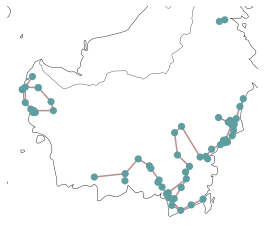

In [25]:
# determine the connected components (again?)

network.determine_network_topology()

network.plot()